In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
import numpy as np
import pandas as pd

In [79]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/t2-1-train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/t2-1-test.csv')

In [80]:
df = pd.concat([train, test], axis =0)

In [81]:
df

,id,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,10000,28,Private Sector/Self Employed,Yes,1250000.0,6,1,No,No,0.0
1,10001,31,Private Sector/Self Employed,Yes,1250000.0,7,1,No,No,0.0
2,10002,29,Private Sector/Self Employed,Yes,1200000.0,7,0,No,No,1.0
3,10003,33,Government Sector,Yes,650000.0,6,1,No,No,1.0
4,10004,28,Private Sector/Self Employed,Yes,800000.0,6,0,No,Yes,1.0
...,...,...,...,...,...,...,...,...,...,...
492,492,25,Private Sector/Self Employed,No,1150000.0,5,1,Yes,No,NaN
493,493,34,Private Sector/Self Employed,Yes,1500000.0,9,0,Yes,Yes,NaN
494,494,33,Government Sector,Yes,700000.0,4,0,No,No,NaN
495,495,26,Private Sector/Self Employed,Yes,1400000.0,4,0,No,Yes,NaN


In [82]:
df['GraduateOrNot'].replace({'Yes':1, 'No':0}, inplace = True)
df['FrequentFlyer'].replace({'Yes':1, 'No':0}, inplace = True)
df['EverTravelledAbroad'].replace({'Yes':1, 'No':0}, inplace = True)

In [83]:
df['AnnualIncome'].fillna(df['AnnualIncome'].mean(), inplace = True)

In [84]:
df.isna().sum()

id                       0
Age                      0
Employment Type          0
GraduateOrNot            0
AnnualIncome             0
FamilyMembers            0
ChronicDiseases          0
FrequentFlyer            0
EverTravelledAbroad      0
TravelInsurance        497
dtype: int64

In [85]:
df = pd.get_dummies(df, columns = ['Employment Type'])

In [115]:
train = df[:1490]
test = df[1490:]
test.drop(['TravelInsurance'], axis = 1, inplace = True)

<ipython-input-115-0a9a8054fbce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(['TravelInsurance'], axis = 1, inplace = True)


In [98]:
from sklearn.model_selection import train_test_split
target = 'TravelInsurance'
X = train.drop(target, axis = 1)
y = train[target]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size = 0.8)

In [99]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [100]:
y_pred = model.predict(X_valid)

0.7021727609962904


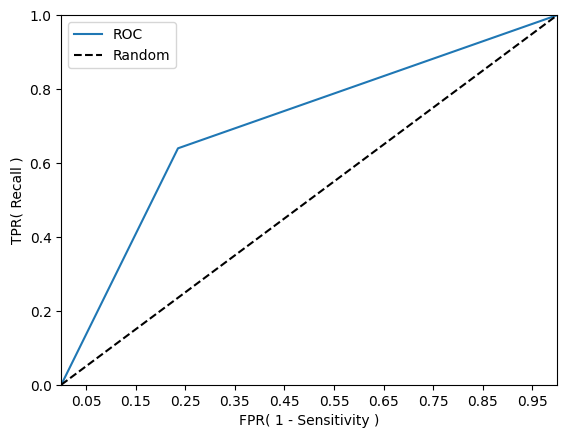

In [101]:
from sklearn.metrics import *
import matplotlib.pyplot as plt
print(roc_auc_score(y_valid, y_pred))

def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음.
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림.
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림.
    plt.plot([0, 1], [0, 1], 'k--', label='Random')

    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()

roc_curve_plot(y_valid, model.predict_proba(X_valid)[:, 1] )

In [116]:
pred = model.predict_proba(test)


<ipython-input-116-b83dd30805e9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['TravelInsurance'] = pred


In [117]:
test['TravelInsurance'] = test['TravelInsurance'].astype('int')
test

<ipython-input-117-bcb4f1cbba1e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['TravelInsurance'] = test['TravelInsurance'].astype('int')


,id,Age,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,Employment Type_Casual employment,Employment Type_Government Sector,Employment Type_Private Sector/Self Employed,TravelInsurance
0,0,32,1,650000.0,5,0,0,0,False,True,False,1
1,1,27,1,500000.0,5,0,0,0,False,True,False,1
2,2,32,1,350000.0,2,0,0,0,False,True,False,1
3,3,26,1,1400000.0,6,0,0,1,False,False,True,1
4,4,27,0,350000.0,3,0,0,0,False,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...
492,492,25,0,1150000.0,5,1,1,0,False,False,True,0
493,493,34,1,1500000.0,9,0,1,1,False,False,True,1
494,494,33,1,700000.0,4,0,0,0,False,True,False,1
495,495,26,1,1400000.0,4,0,0,1,False,False,True,1


In [119]:
sub = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/t2-1-sample_submission.csv')
sub

,id,TravelInsurance
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
...,...,...
492,492,0.5
493,493,0.5
494,494,0.5
495,495,0.5


In [124]:
sub['TravelInsurance'] = pred

In [125]:
sub

,id,TravelInsurance
0,0,1.0
1,1,1.0
2,2,1.0
3,3,1.0
4,4,1.0
...,...,...
492,492,0.0
493,493,1.0
494,494,1.0
495,495,1.0


In [129]:
sub.to_csv('/content/drive/MyDrive/Colab Notebooks/submission.csv', index = False)